In [8]:
%matplotlib widget
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from scipy import constants
import pandas as pd

In [9]:
def mktable(PCPG, PCPE):
    data = pd.DataFrame(0, index=['PC', 'PG', 'PE'], columns=['PC', 'PG', 'PE'])
    data.loc['PC','PG'] = PCPG
    data.loc['PC','PE'] = PCPE
    data.loc['PG','PE'] = PCPG - PCPE

    data.loc['PG','PC'] = -data.loc['PC','PG']
    data.loc['PE','PC'] = -data.loc['PC','PE']
    data.loc['PE','PG'] = -data.loc['PG','PE']
    
    return data

In [10]:
def logSpace(xmin=-9, xmax=0, N=1000):
    grid_x = np.logspace(xmin, xmax, N)

    xPG, xPE = np.meshgrid(grid_x, grid_x) #titration grid

    xPC =  np.full((N, N), 1.0) - (xPG + xPE) #PC+PG+PE=1
    mask = xPC<0
    xPG=np.where(~mask, xPG, np.nan)
    xPE=np.where(~mask, xPE, np.nan)
    
    return xPC, xPG, xPE

In [11]:
def linSpace(xmin=0, xmax=1, N=1000):
    grid_x = np.linspace(xmin, xmax, N)

    xPG, xPE = np.meshgrid(grid_x, grid_x) #titration grid

    xPC =  np.full((N, N), 1.0) - (xPG + xPE) #PC+PG+PE=1
    mask = xPC<0
    xPG=np.where(~mask, xPG, np.nan)
    xPE=np.where(~mask, xPE, np.nan)
    
    return xPC, xPG, xPE

In [12]:
def genLogProb(E5, WT, RT):
    #Boltzmann weights
    KCG5  = np.exp(-E5.loc['PG','PC'] / RT)
    KCGWT = np.exp(-WT.loc['PG','PC'] / RT)
    KCE5  = np.exp(-E5.loc['PE','PC']/ RT)
    KCEWT = np.exp(-WT.loc['PE','PC'] / RT)

    data = (xPC + KCG5 * xPG + KCE5 * xPE) / (xPC + KCGWT * xPG + KCEWT * xPE)
    data = np.log(data)
    #data=np.where(mask, data, np.nan)
    
    return data

In [13]:
def makeContourf(xPG, xPE, data, xmin=1e-9, xmax=1, log=True):
    %matplotlib widget
    
    fig, ax = plt.subplots()
    ax.plot(0.25, 0.25, ".k", label='2:1:1 PC:PG:PE')
    ax.plot(0.25, 1e-9, ".r", label='3:1 PC:PG')
    ax.plot(1/60, 1e-9, ".", color='white', label='60:1 PC:PG')
    ax.plot(1e-9, 1/60, ".", color='orange', label='60:1 PC:PE')
    cf = ax.contourf(xPG, xPE, data, levels=100)
    ax.set_xlabel("PG content")
    ax.set_ylabel("PE content")
    #ax.title.set_text("Relative log-probability of ELIC5 conformation")
    ax.legend(loc='center right')
    
    if log:
        ax.set_xscale("log")
        ax.set_yscale("log") 
    
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([xmin,xmax])

    ax.set_aspect('equal')
    fig.colorbar(cf, ax=ax)
    
    return fig, ax

In [14]:
    "DG_PG_5  = -7\n",
    "DG_PG_WT = -11\n",
    "DG_PE_5  = -2\n",
    "DG_PE_WT = -9"


#Changes in free energy to move X from the bulk to the bound state, replacing PC
DG_PG_5  = -3
DG_PG_WT = -6
DG_PE_5  = -2
DG_PE_WT = -4

#Constants
temperature = 303.15 #Kelvin
RT = temperature*constants.R/(1000*constants.calorie) #kcal/mol

In [15]:
WT = mktable(-DG_PG_WT, -DG_PE_WT)
E5 = mktable(-DG_PG_5, -DG_PE_5)

In [22]:
#xPC, xPG, xPE = logSpace(-9, 0, 1000) #e^-9 to e^0, 1000 steps
xPC, xPG, xPE = linSpace(0, 1, 1000) #e^-9 to e^0, 1000 steps
data = genLogProb(E5, WT, RT)

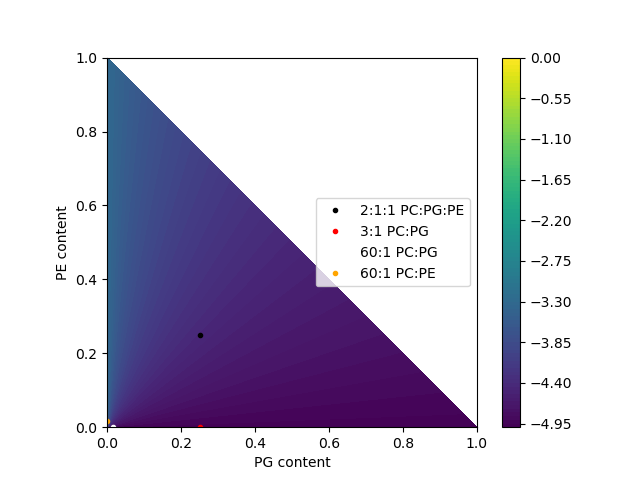

In [24]:
#fig, ax = makeContourf(xPG, xPE, data)
fig, ax = makeContourf(xPG, xPE, data, xmin=0, log=False)
#plt.savefig('log_E5.png', dpi=600)

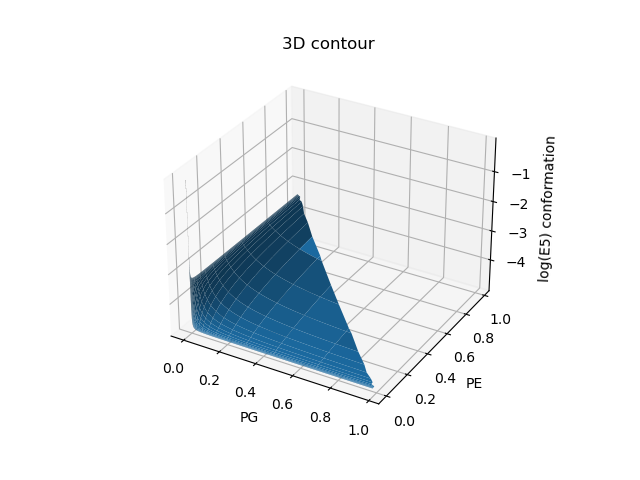

In [169]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xPG, xPE, data)
ax.set_xlabel('PG')
ax.set_ylabel('PE')
ax.set_zlabel('log(E5) conformation')

ax.set_title('3D contour')
plt.show()


# Binding in a Ternary Mixture (implementation of derivation posted Sunday, April 3, 2022)

In [7]:
#Changes in free energy relative to PC
#DG_PG_5  = -7
#DG_PG_WT = -11
#DG_PE_5  = -2
#DG_PE_WT = -9
#for reference

In [8]:
#pAa_pAb = Xa_Xb * exp(- DG_btoa/RT)

In [41]:
def getRelProb(alpha, beta, xa, xb, table, RT):
    prob = xa/xb * np.exp(-table.loc[beta, alpha]/RT)
    return prob

In [47]:
getRelProb('PG', 'PC', 1, 2, WT, RT)

5.8735672289420855e-09